In [91]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure
import warnings
warnings.filterwarnings("ignore")

In [92]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [93]:
xTrain0 = xTrain[yTrain==0,:,:]
xTrain1 = xTrain[yTrain==1,:,:]
xTrain2 = xTrain[yTrain==2,:,:]
xTrain3 = xTrain[yTrain==3,:,:]
xTrain4 = xTrain[yTrain==4,:,:]
xTrain5 = xTrain[yTrain==5,:,:]
xTrain6 = xTrain[yTrain==6,:,:]
xTrain7 = xTrain[yTrain==7,:,:]
xTrain8 = xTrain[yTrain==8,:,:]
xTrain9 = xTrain[yTrain==9,:,:]

In [94]:
xTrainTh0 = 1*(xTrain0 > 80)
xTrainTh1 = 1*(xTrain1 > 80)
xTrainTh2 = 1*(xTrain2 > 80)
xTrainTh3 = 1*(xTrain3 > 80)
xTrainTh4 = 1*(xTrain4 > 80)
xTrainTh5 = 1*(xTrain5 > 80)
xTrainTh6 = 1*(xTrain6 > 80)
xTrainTh7 = 1*(xTrain7 > 80)
xTrainTh8 = 1*(xTrain8 > 80)
xTrainTh9 = 1*(xTrain9 > 80)

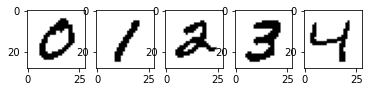

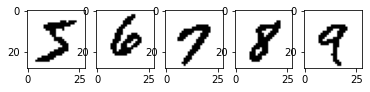

In [95]:
plt.figure()
plt.subplot(1,5,1)
plt.imshow(xTrainTh0[0][:][:],cmap="gray_r")
plt.subplot(1,5,2)
plt.imshow(xTrainTh1[0][:][:],cmap="gray_r")
plt.subplot(1,5,3)
plt.imshow(xTrainTh2[0][:][:],cmap="gray_r")
plt.subplot(1,5,4)
plt.imshow(xTrainTh3[0][:][:],cmap="gray_r")
plt.subplot(1,5,5)
plt.imshow(xTrainTh4[0][:][:],cmap="gray_r")
plt.figure()
plt.subplot(1,5,1)
plt.imshow(xTrainTh5[0][:][:],cmap="gray_r")
plt.subplot(1,5,2)
plt.imshow(xTrainTh6[0][:][:],cmap="gray_r")
plt.subplot(1,5,3)
plt.imshow(xTrainTh7[0][:][:],cmap="gray_r")
plt.subplot(1,5,4)
plt.imshow(xTrainTh8[0][:][:],cmap="gray_r")
plt.subplot(1,5,5)
plt.imshow(xTrainTh9[0][:][:],cmap="gray_r")

In [96]:
def RegionProperties(xTh): # Function to calculate region properties
  xArea = np.zeros(xTh.shape[0])
  xEccentricity = np.zeros(xTh.shape[0])
  for i in range(0,xTh.shape[0]):
    props = measure.regionprops(xTh[i,:,:])
    xArea[i] = props[0].area
    xEccentricity[i] = props[0].eccentricity

  return xArea, xEccentricity

In [97]:
def numMean(xArea,xEccentricity): # Function to calculate mean of region properites
  propMean = np.array([np.mean(xArea),np.mean(xEccentricity)])
  return propMean

In [98]:
def withinClassMatrix(matrixNum): #Function to calculate within class scatter matrix for the number
  WCSMatrixNum = np.zeros((2,2))
  for i in range(matrixNum.shape[0]):
    row, col = np.array([matrixNum[i][:]]).reshape(2,1),meanVector[0].reshape(2,1)
    WCSMatrixNum += (row-col).dot((row-col).T) 
  return WCSMatrixNum

In [99]:
def betweenClassMatrix(overallMean): #Function to calculate between class scatter matrix 
  BCSMat = np.zeros((2,2))
  for k in range (2):
    n = shapeMatrix[k]
    mv = meanVector[k].reshape(2,1)
    overallMean = overallMean.reshape(2,1)
    BCSMat += n * (overallMean-mv).dot((overallMean-mv).T)
  return  BCSMat

In [100]:
def eigCalculation(WCS,BCS): #Function to calculate eigen values and eigen vectors from WCS and BCS
  eigVals, eigVecs = np.linalg.eig(np.linalg.inv(WCS).dot(BCS))
  return eigVals, eigVecs

In [101]:
def eigSorting(eigVal,eig_vec):
  # Make a list of (eigenvalue, eigenvector) tuples
  eigPairs = [(np.abs(eigVal[i]), eig_vec[:,i]) for i in range(len(eigVal))]
  eigPairs = sorted(eigPairs, key=lambda k: k[0], reverse=True) #Descending sort
  return eigPairs
  

In [102]:
def fisherDiscriminant(ePair):#Function to calculate fisher discriminant
  det = np.hstack(ePair[0][1].reshape(2,1))
  det = det.reshape(2,1)
  return det

In [103]:
#Region properties of 0
xTrainArea0 , xTrainEccentricity0 = RegionProperties(xTrainTh0)

In [104]:
#Region properties of 1
xTrainArea1, xTrainEccentricity1 = RegionProperties(xTrainTh1)

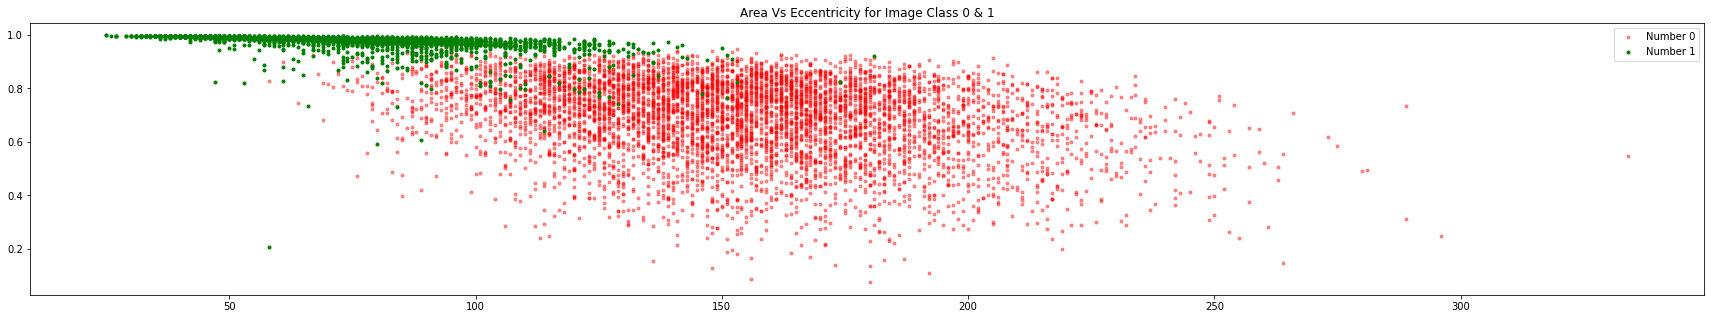

In [105]:
plt.figure(figsize=(30,5)) #Scatter of 0 and 1 area  vs eccentricity
plt.scatter(xTrainArea0,xTrainEccentricity0, label='Number 0',color = "red",alpha=.4,marker=".")
plt.scatter(xTrainArea1,xTrainEccentricity1, label='Number 1',color="g",marker=".")
plt.title('Area Vs Eccentricity for Image Class 0 & 1')
plt.legend()

In [106]:
mean0 = numMean(xTrainArea0,xTrainEccentricity0)
mean1 = numMean(xTrainArea1,xTrainEccentricity1)

In [107]:
print("Mean vector class 0:\n",mean0)
print("Mean vector class 1:\n",mean1)
meanVector = np.array([mean0,mean1])
print("Mean vector overall:\n",meanVector)

Mean vector class 0:
 [153.99324667   0.6895741 ]
Mean vector class 1:
 [67.89676654  0.98139807]
Mean vector overall:
 [[153.99324667   0.6895741 ]
 [ 67.89676654   0.98139807]]


In [108]:
shapeMatrix = np.array([xTrainTh0.shape[0],xTrainTh1.shape[0]])
areaMatrix = np.array([xTrainArea0,xTrainArea1])
eccentricityMatrix = np.array([xTrainEccentricity0,xTrainEccentricity1])
matrix0 = np.array([xTrainArea0,xTrainEccentricity0]).T
matrix1 = np.array([xTrainArea1,xTrainEccentricity1]).T

In [109]:
WCSMatrix0 = withinClassMatrix(matrix0)

In [110]:
WCSMatrix1 = withinClassMatrix(matrix1)

In [111]:
WCSMatrix = WCSMatrix0 + WCSMatrix1 #Within class scatter matrix

In [112]:
WCSMatrix

array([[ 5.89114813e+07, -1.78717426e+05],
       [-1.78717426e+05,  7.04056928e+02]])

In [113]:
overallMean = (mean0+mean1)/2

In [114]:
BCSMatrix = betweenClassMatrix(overallMean)

In [115]:
print("Between class scatter matrix \n",BCSMatrix)

Between class scatter matrix 
 [[ 2.34701571e+07 -7.95520858e+04]
 [-7.95520858e+04  2.69641756e+02]]


In [116]:
eigValues, eigVectors = eigCalculation(WCSMatrix,BCSMatrix)

In [117]:
print("Eigen Vectors:\n",eigVectors)

Eigen Vectors:
 [[ 0.00468889  0.00338948]
 [-0.99998901  0.99999426]]


In [118]:
for i in range(len(eigValues)):
    eigVecSC = eigVectors[:,i].reshape(2,1)   
    print('Eigenvector {}: \n{}'.format(i+1, eigVecSC.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eigValues[i].real))
    print()

Eigenvector 1: 
[[ 0.00468889]
 [-0.99998901]]
Eigenvalue 1: 4.17e-01

Eigenvector 2: 
[[0.00338948]
 [0.99999426]]
Eigenvalue 2: 7.49e-16



In [119]:
eigPairs = eigSorting(eigValues,eigVectors)

In [120]:
print('Eigenvalues in decreasing order:\n')
for i in eigPairs:
  print(i[0])

Eigenvalues in decreasing order:

0.4167541838227594
7.494005416219807e-16


In [121]:
print('Variance:\n')
eigVSum = sum(eigValues)
for i,j in enumerate(eigPairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigVSum).real))

Variance:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%


In [122]:
W = fisherDiscriminant(eigPairs)

In [123]:
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.00468889]
 [-0.99998901]]


In [124]:
input0 = np.array([xTrainArea0 ,xTrainEccentricity0]).T
input1 = np.array([xTrainArea1 ,xTrainEccentricity1]).T

In [125]:
XLda0 = np.array(input0.dot(W))
XLda1 = np.array(input1.dot(W))

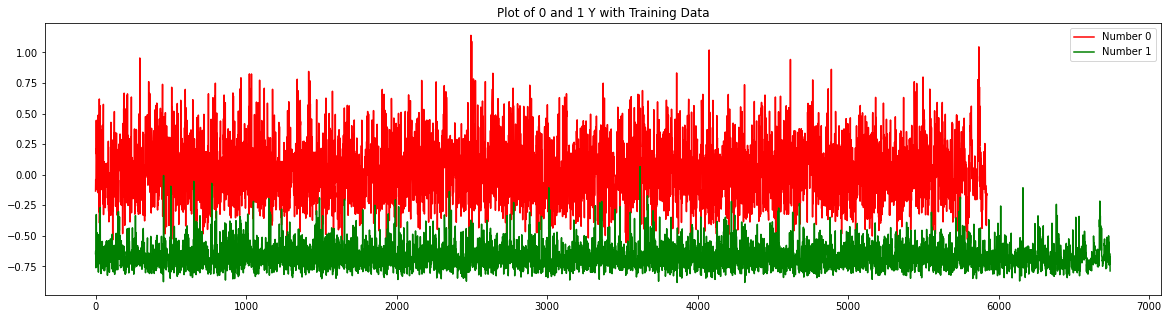

In [126]:
plt.figure(figsize=(20,5))
plt.plot(XLda0,label="Number 0",color="r")
plt.plot(XLda1,label="Number 1",color="g")
plt.title("Plot of 0 and 1 Y with Training Data")
plt.legend()

In [127]:
xTest0 = xTest[yTest==0,:,:]
xTest1 = xTest[yTest==1,:,:]

In [128]:
xTestTh0 = 1*(xTest0 > 80)
xTestTh1 = 1*(xTest1 > 80)

In [129]:
xTestArea0, xTestEccentricity0 = RegionProperties(xTestTh0)
xTestArea1, xTestEccentricity1 = RegionProperties(xTestTh1)

In [130]:
testMatrixShape = np.array([xTestTh0.shape[0],xTestTh1.shape[0]])

In [131]:
testInput0 = np.array([xTestArea0,xTestEccentricity0]).T
testInput1 = np.array([xTestArea1,xTestEccentricity1]).T

In [132]:
xTestLda0 = np.array(testInput0.dot(W))
xTestLda1 = np.array(testInput1.dot(W))

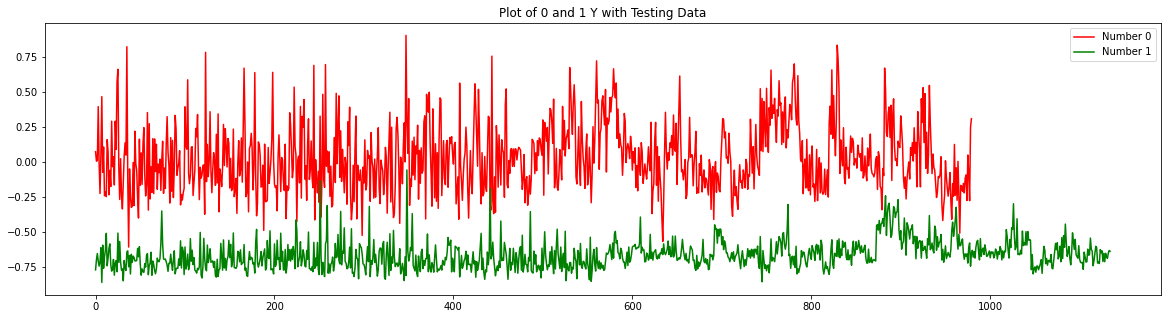

In [133]:
plt.figure(figsize=(20,5))
plt.plot(xTestLda0,label="Number 0",color="r")
plt.plot(xTestLda1,label="Number 1",color="g")
plt.title("Plot of 0 and 1 Y with Testing Data")
plt.legend()

In [134]:
print ("The number of 0s in test sample: " + str(xTest0.shape[0]))
threshold = 7
count0 = 0
k = 0
failed0 = {}
for  i,x in enumerate(xTestLda0) : 
    if x < threshold : 
        count0 = count0 + 1
    else :
        failed0[k] = i
        k = k + 1
print ("The number of classified 0s : " + str(count0))

The number of 0s in test sample: 980
The number of classified 0s : 980


In [135]:
print ("The number of 1s in test sample: " + str(xTest1.shape[0]))
threshold = 7
count1 = 0
k = 0
failed1 = {}
for  i,x in enumerate(xTestLda1) : 
    if x < threshold : 
        count1 = count1 + 1
    else :
        failed1[k] = i
        k = k + 1
print ("The number of classified 1s : " + str(count1))

The number of 1s in test sample: 1135
The number of classified 1s : 1135


In [136]:
print("Accuracy of classification - ")
print((count0+count1)/((xTest0.shape[0])+(xTest1.shape[0]))*100)

Accuracy of classification - 
100.0


In [137]:
#Working on 5 and 6

In [138]:
xTrain5 = xTrain[yTrain==5,:,:]
xTrain6 = xTrain[yTrain==6,:,:]

In [139]:
xTrainTh5 = 1*(xTrain5 > 80)
xTrainTh6 = 1*(xTrain6 > 80)

In [140]:
xTrainArea5, xTrainEccentricity5 = RegionProperties(xTrainTh5)
xTrainArea6, xTrainEccentricity6 = RegionProperties(xTrainTh6)

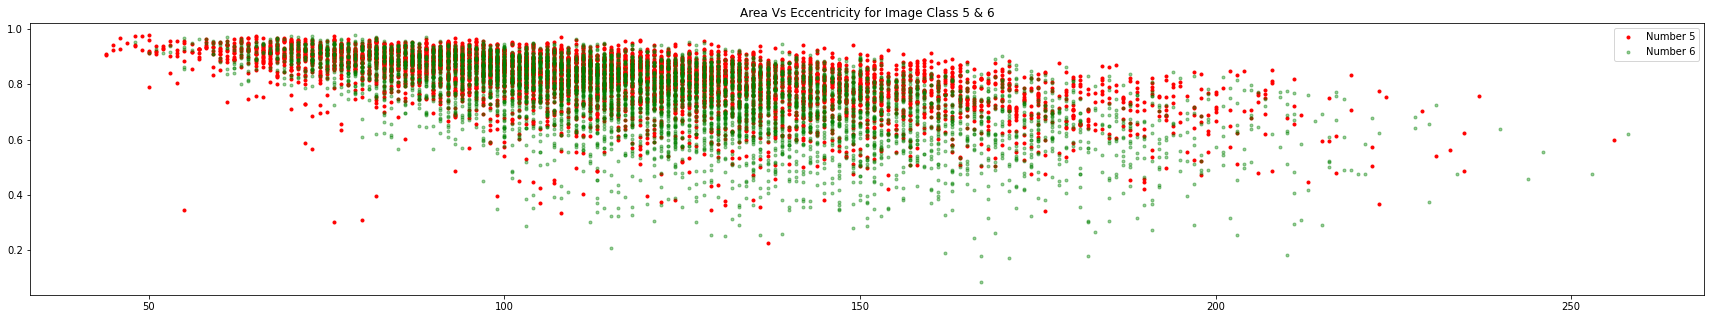

In [141]:
plt.figure(figsize=(30,5)) #Scatter of 5 and 6 area  vs eccentricity
plt.scatter(xTrainArea5,xTrainEccentricity5, label='Number 5',color = "red",marker=".")
plt.scatter(xTrainArea6,xTrainEccentricity6, label='Number 6',color="g",marker=".",alpha=.4)
plt.title('Area Vs Eccentricity for Image Class 5 & 6')
plt.legend()

In [142]:
mean5 = numMean(xTrainArea5,xTrainEccentricity5)
mean6 = numMean(xTrainArea6,xTrainEccentricity6)

In [143]:
print("Mean vector class 5:\n",mean5)
print("Mean vector class 6:\n",mean6)

Mean vector class 5:
 [116.94945582   0.81948012]
Mean vector class 6:
 [122.92362285   0.75659077]


In [144]:
meanVectorNew = np.array([mean5,mean6])

In [145]:
print("Mean vector overall:\n",meanVectorNew)

Mean vector overall:
 [[116.94945582   0.81948012]
 [122.92362285   0.75659077]]


In [146]:
shapematrixnew = np.array([xTrainTh5.shape[0],xTrainTh6.shape[0]])
areamatrixnew = np.array([xTrainArea5,xTrainArea6])
eccentricitymatrixnew = np.array([xTrainEccentricity5,xTrainEccentricity6])
matrix5 = np.array([xTrainArea5,xTrainEccentricity5]).T
matrix6 = np.array([xTrainArea6,xTrainEccentricity6]).T

In [147]:
WCSMatrix5 = withinClassMatrix(matrix5)
WCSMatrix6 = withinClassMatrix(matrix6)

In [148]:
WCSMatrixnew = WCSMatrix5 + WCSMatrix6

In [149]:
print("Within class scatter matrix \n",WCSMatrixnew)

Within class scatter matrix 
 [[ 2.38560787e+07 -6.01848991e+04]
 [-6.01848991e+04  2.67528380e+02]]


In [150]:
overallmeannew = (mean5+mean6)/2

In [151]:
BCSMatNew = betweenClassMatrix(overallmeannew)

In [152]:
print("Between class scatter matrix \n",BCSMatNew)

Between class scatter matrix 
 [[ 2.51281128e+07 -8.77031079e+04]
 [-8.77031079e+04  3.09498690e+02]]


In [153]:
eigValuesNew, eigVectorsNew = eigCalculation(WCSMatrixnew,BCSMatNew)

In [154]:
print("Eigen Vectors:\n",eigVectors)

Eigen Vectors:
 [[ 0.00468889  0.00338948]
 [-0.99998901  0.99999426]]


In [155]:
for i in range(len(eigValuesNew)):
    eigVecSC = eigVectorsNew[:,i].reshape(2,1)   
    print('Eigenvector {}: \n{}'.format(i+1, eigVecSC.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eigValuesNew[i].real))
    print()

Eigenvector 1: 
[[-0.00351325]
 [-0.99999383]]
Eigenvalue 1: 2.45e-02

Eigenvector 2: 
[[ 0.00237355]
 [-0.99999718]]
Eigenvalue 2: 1.26e+00



In [156]:
eigPairsNew = eigSorting(eigValuesNew,eigVectorsNew)

In [157]:
print('Eigenvalues in decreasing order:\n')
for i in eigPairsNew:
  print(i[0])

Eigenvalues in decreasing order:

1.2614313408187474
0.024496043876769846


In [158]:
print('Variance:\n')
eigVSum = sum(eigValuesNew)
for i,j in enumerate(eigPairsNew):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigVSum).real))

Variance:

eigenvalue 1: 98.10%
eigenvalue 2: 1.90%


In [159]:
WNew = fisherDiscriminant(eigPairsNew)

In [160]:
print('Matrix W:\n', WNew.real)

Matrix W:
 [[ 0.00237355]
 [-0.99999718]]


In [161]:
trainInput5 = np.array([xTrainArea5 ,xTrainEccentricity5]).T
trainInput6 = np.array([xTrainArea6 ,xTrainEccentricity6]).T

In [162]:
xTrainLda5 = np.array(trainInput5.dot(WNew))
xTrainLda6 = np.array(trainInput6.dot(WNew))

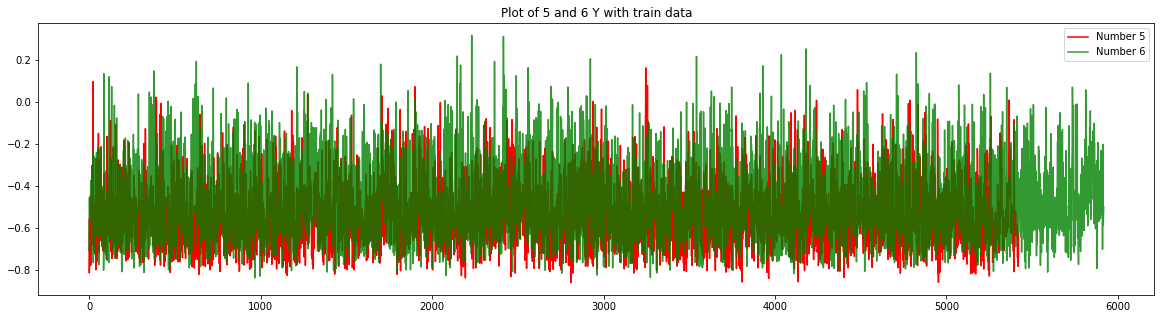

In [163]:
plt.figure(figsize=(20,5))
plt.plot(xTrainLda5,label="Number 5",color="r")
plt.plot(xTrainLda6,label="Number 6",color="g",alpha=.8)
plt.title("Plot of 5 and 6 Y with train data")
plt.legend()

In [164]:
#Testing on 5 and 6

In [165]:
xTest5 = xTest[yTest==5,:,:]
xTest6 = xTest[yTest==6,:,:]

In [166]:
xTestTh5 = 1*(xTest5 > 80)
xTestTh6 = 1*(xTest6 > 80)

In [167]:
xTestArea5, xTestEccentricity5 = RegionProperties(xTestTh5)
xTestArea6, xTestEccentricity6 = RegionProperties(xTestTh6)

In [168]:
testMatrixShape = np.array([xTestTh5.shape[0],xTestTh6.shape[0]])

In [169]:
testInput5 = np.array([xTestArea5,xTestEccentricity5]).T
testInput6 = np.array([xTestArea6,xTestEccentricity6]).T

In [170]:
xTestLda5 = np.array(testInput5.dot(WNew))
xTestLda6 = np.array(testInput6.dot(WNew))

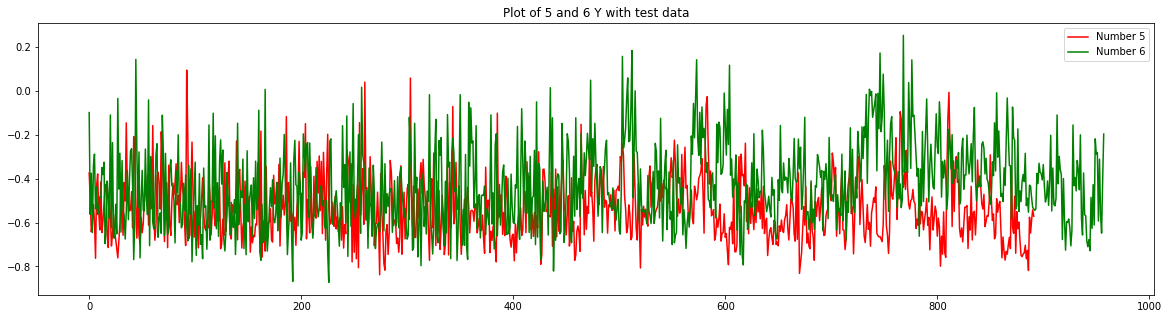

In [171]:
plt.figure(figsize=(20,5))
plt.plot(xTestLda5,label="Number 5",color="r")
plt.plot(xTestLda6,label="Number 6",color="g")
plt.title("Plot of 5 and 6 Y with test data")
plt.legend()

In [172]:
print ("The number of 5s in test sample: " + str(xTest5.shape[0]))
threshold = 7
count5 = 0
k = 0
failed5 = {}
for  i,x in enumerate(xTestLda5) : 
    if x < threshold : 
        count5 = count5 + 1
    else :
        failed5[k] = i
        k = k + 1
print ("The number of classified 5s : " + str(count5))

The number of 5s in test sample: 892
The number of classified 5s : 892


In [173]:
for k in failed5 :
    failed5Value = xTestTh5[k,:,:]
    plt.imshow(failed5Value,cmap="gray_r")
    plt.show()

In [174]:
print ("The number of 6s in test sample: " + str(xTest6.shape[0]))
threshold = 7
count6 = 0
k = 0
failed6 = {}
for  i,x in enumerate(xTestLda6) : 
    if x < threshold : 
        count6 = count6 + 1
    else :
        failed6[k] = i
        k = k + 1
print ("The number of classified 6s : " + str(count6))

The number of 6s in test sample: 958
The number of classified 6s : 958


In [175]:
for k in failed6 :
    failed5Value = xTestTh6[k,:,:]
    plt.imshow(failed6Value,cmap="gray_r")
    plt.show()